##Laboratory work 3

Find a solution to the Poisson equation in a periodically closed domain:
\begin{equation}
  \begin{cases}
    \Delta u = -32\cos(4x) - 25\sin(4x + 3y) \\
    u(x+\pi, y) = u(x, y) \\
    u(x, y+2\pi) = u(x, y) \\
    0 < x < \pi, 0 < y < 2\pi
  \end{cases}
\end{equation}

Exact solution:
\begin{equation}
  u_0(x, y) = 2\cos(4x) + \sin(4x+3y)
\end{equation}

In laboratory work, it is necessary to solve the problem using the Seidel method, construct an exact solution, numerically solution and error.

Exstras:
*   Error depending on iteration number
*   Error depending on step

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# grid creating
h0 = 0.05
l_x = np.pi
l_y = np.pi * 2
nx = int(np.round(l_x / h0))
ny = int(np.round(l_y / h0))

hx = l_x / nx
hy = l_y / ny

x = np.linspace(0.5 * hx, l_x - 0.5 * hx, nx)
y = np.linspace(0.5 * hy, l_y - 0.5 * hy, ny)
X, Y = np.meshgrid(x, y, indexing = 'ij')

In [21]:
# right side
def RHS(X, Y):
  res = 32 * np.cos(4*X) + 25 * np.sin(4*X + 3*Y)
  return res - res.mean()

In [22]:
#seidel method
def solve_seidel(nx, ny, hx, hy, X, Y, tol=1e-6, max_iter=1000):
    f = RHS(X, Y)
    u = np.zeros((nx, ny))
    errors = []

    for iteration in range(max_iter):
        max_error = 0
        for i in range(nx):
            for j in range(ny):

                i_minus = (i - 1) % nx
                i_plus = (i + 1) % nx
                j_minus = (j - 1) % ny
                j_plus = (j + 1) % ny

                old_value = u[i % nx, j % ny]

                u[i, j] = (hx**2 * hy**2 * f[i, j] + (u[i_plus, j] + u[i_minus, j]) * hy**2 + (u[i, j_plus] + u[i, j_minus]) * hx**2) / (2 * (hy**2 + hx**2))

                max_error = max(max_error, abs(u[i, j] - old_value))
        u -= u.mean()
        errors.append(max_error)

        if max_error < tol:
            return u, errors

    return u, errors

def exact_solution(X, Y):
    res = 2 * np.cos(4 * X) + np.sin(4 * X + 3 * Y)
    return res - res.mean()

In [23]:
u_solution, errors = solve_seidel(nx, ny, hx, hy, X, Y)

u_exact = exact_solution(X, Y)

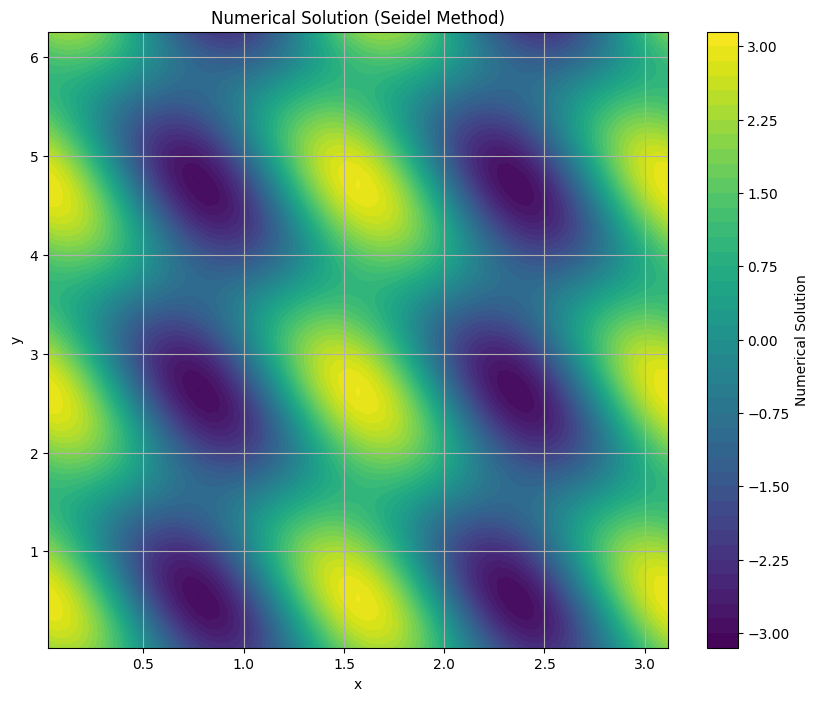

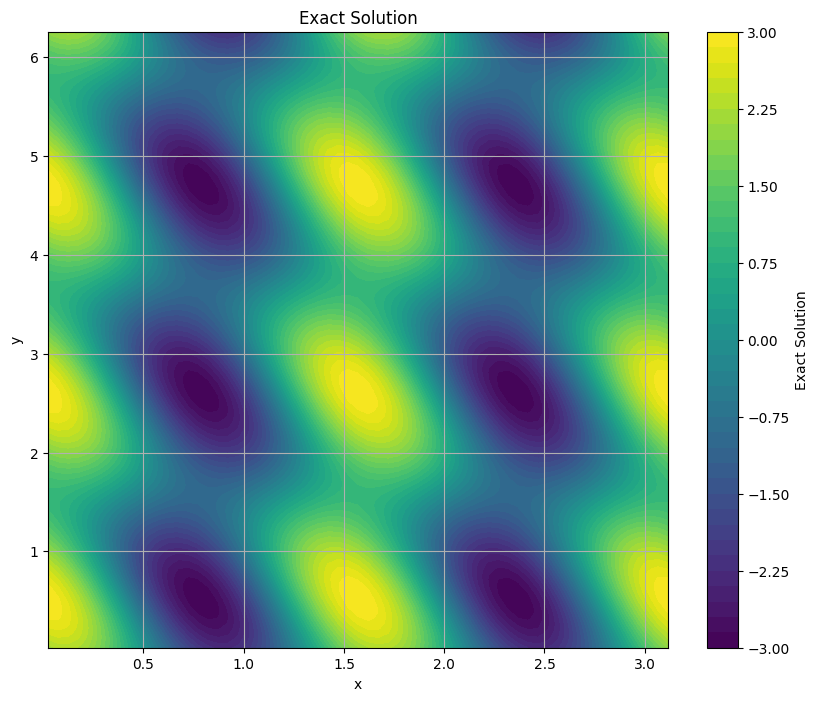

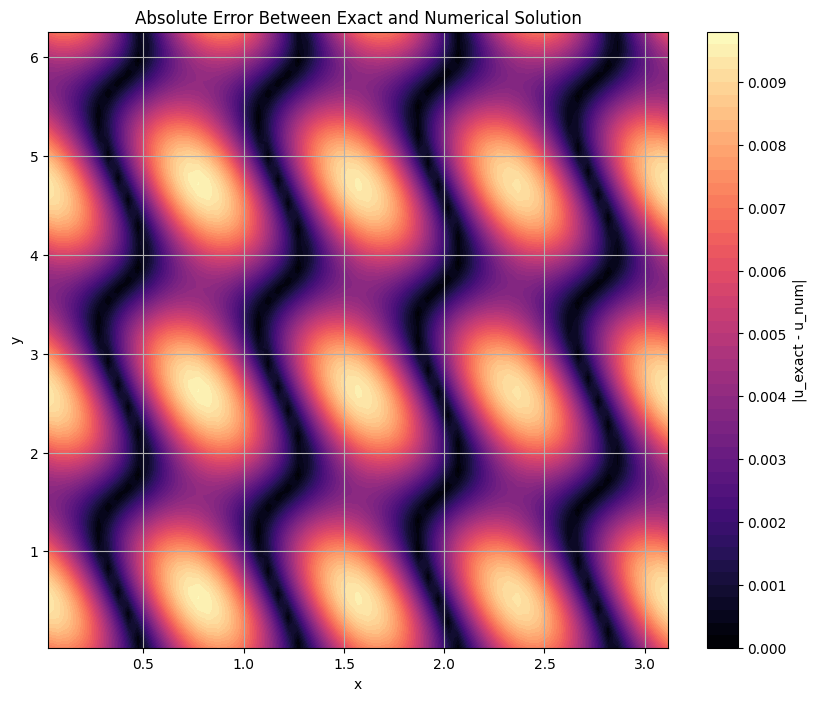

In [24]:
# График численного решения
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, u_solution, levels=50, cmap='viridis')
plt.colorbar(label='Numerical Solution')
plt.title('Numerical Solution (Seidel Method)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# График точного решения
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, u_exact, levels=50, cmap='viridis')
plt.colorbar(label='Exact Solution')
plt.title('Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# График разности между точным и численным решениями
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, np.abs(u_exact - u_solution), levels=50, cmap='magma')
plt.colorbar(label='|u_exact - u_num|')
plt.title('Absolute Error Between Exact and Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

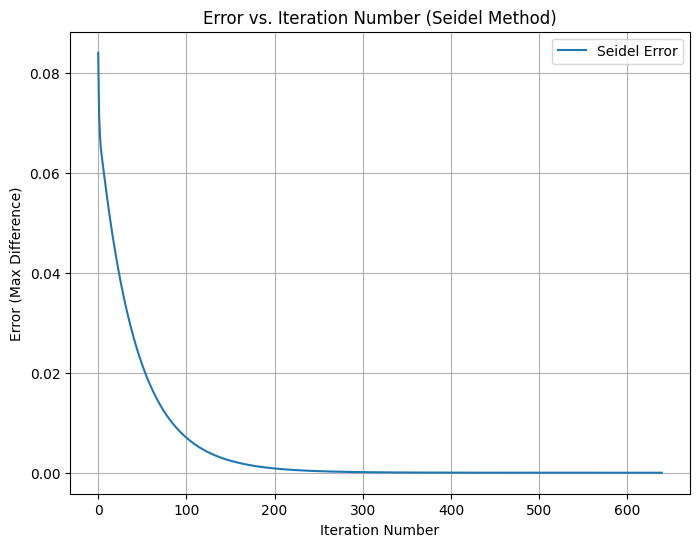

In [25]:
# dependence of the error on the iteration number

plt.figure(figsize=(8, 6))
plt.plot(range(len(errors)), errors, label='Seidel Error')

plt.xlabel('Iteration Number')
plt.ylabel('Error (Max Difference)')
plt.title('Error vs. Iteration Number (Seidel Method)')
plt.legend()
plt.grid(True)
plt.show()

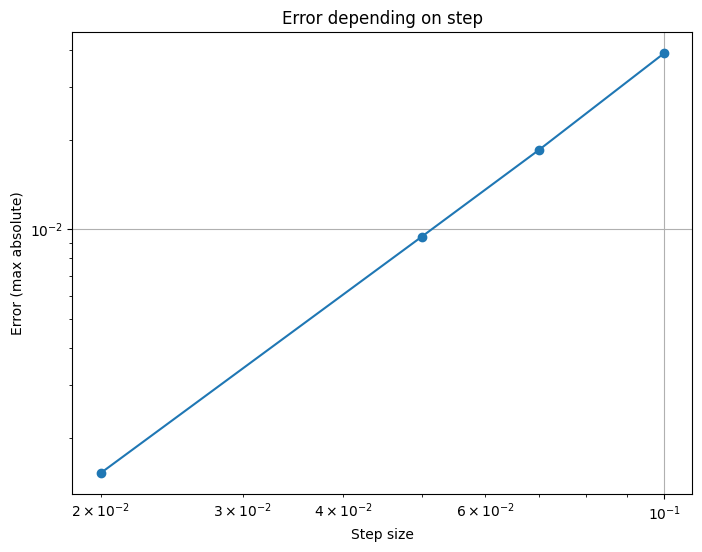

In [28]:
# dependence of the error on the step

h_values = [0.1, 0.07, 0.05, 0.02]
errors = []

for h0 in h_values:
    nx = int(np.round(l_x / h0))
    ny = int(np.round(l_y / h0))
    hx = l_x / nx
    hy = l_y / ny
    x = np.linspace(0.5 * hx, l_x - 0.5 * hx, nx)
    y = np.linspace(0.5 * hy, l_y - 0.5 * hy, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    u, q = solve_seidel(nx, ny, hx, hy, X, Y, tol=1e-9, max_iter=10000)

    u_0 = exact_solution(X, Y)

    error = np.max(np.abs(u - u_0))
    errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(h_values, errors, marker='o', linestyle='-')
plt.xlabel('Step size')
plt.ylabel('Error (max absolute)')
plt.xscale("log")
plt.yscale("log")
plt.title("Error depending on step")
plt.grid(True)
plt.show()

In [29]:
errors

[0.039106280072693345,
 0.018540191434700315,
 0.009442284312307425,
 0.0015190214996110285]